In [1]:
import numpy as np
from bio_embeddings.embed import SeqVecEmbedder, ProtTransBertBFDEmbedder
import pandas as pd
from bio_embeddings.project import tsne_reduce
from bio_embeddings.visualize import render_3D_scatter_plotly
import seaborn as sns
import matplotlib.pyplot as plt
from os import path

In [2]:
DATA_DIR = "../../data/"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/chen_data.csv"))
chen_data.head(5)

Antibody_ID                                              heavy  \
0        12e8  EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...   
1        15c8  EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...   
2        1a0q  EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...   
3        1a14  QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...   
4        1a2y  QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...   

                                               light  Y  
0  DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...  0  
1  DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...  0  
2  DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...  1  
3  DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...  0  
4  DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...  0

In [4]:
len(chen_data)

2409

In [5]:
def embed_sequence(sequence, embedder):
    embedding = embedder.embed(sequence)
    reduced = embedder.reduce_per_protein(embedding)
    return reduced

In [6]:
def embed_row(row, embedder):
    desc_heavy = embed_sequence(row["heavy"], embedder)
    desc_light = embed_sequence(row["light"], embedder)
    all_desc = np.concatenate((desc_heavy, desc_light))
    return np.asarray(all_desc)

In [7]:
embedders = []

In [8]:
embedders.append(ProtTransBertBFDEmbedder())
embedders.append(SeqVecEmbedder())

Some weights of the model checkpoint at /home/brazdilv/.cache/bio_embeddings/prottrans_bert_bfd/model_directory were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
bert = embedders[0]
seqvec = embedders[1]

In [20]:
bert_embeddings = pd.DataFrame(chen_data[["heavy", "light"]].apply(embed_row, args=(bert, ), axis=1).to_list())
bert_embeddings.insert(0, "Ab_ID", chen_data["Antibody_ID"])
bert_embeddings.columns = bert_embeddings.columns.astype(str)
bert_embeddings.to_feather(path.join(DATA_DIR, "chen/embeddings/bert/bert_chen_embeddings.ftr"))
bert_embeddings.head()

Ab_ID         0         1         2         3         4         5         6  \
0  12e8  0.000388 -0.023631  0.008127 -0.042201  0.069842 -0.020211  0.009360   
1  15c8 -0.007020 -0.024430  0.014849 -0.031923  0.054462 -0.025220  0.007521   

          7         8  ...      2038      2039      2040      2041      2042  \
0 -0.093598 -0.015777  ...  0.000845 -0.017396 -0.025206  0.006201  0.003746   
1 -0.098703 -0.016063  ... -0.007535  0.021122 -0.044553 -0.009425 -0.004844   

       2043      2044      2045      2046      2047  
0  0.038917 -0.032526 -0.039207 -0.014133 -0.013472  
1  0.044911 -0.022525 -0.019677 -0.013022 -0.049844  

[2 rows x 2049 columns]

In [51]:
seqvec_embeddings = pd.DataFrame(chen_data[["heavy", "light"]].apply(embed_row, args=(seqvec, ), axis=1).to_list())
seqvec_embeddings.insert(0, "Ab_ID", chen_data["Antibody_ID"])
seqvec_embeddings.columns = seqvec_embeddings.columns.astype(str)
seqvec_embeddings.to_feather(path.join(DATA_DIR, "chen/embeddings/seqvec/seqvec_chen_embeddings.ftr"))
seqvec_embeddings.head()

Ab_ID         0         1         2         3         4         5         6  \
0  12e8  0.044894 -0.181364 -0.248595 -0.145002  0.070424 -0.005699  0.029236   
1  15c8  0.045137 -0.169259 -0.213841 -0.102636  0.079760 -0.031285  0.035190   
2  1a0q  0.073347 -0.186018 -0.233184 -0.165189  0.064193 -0.030149  0.043134   
3  1a14  0.066646 -0.216164 -0.275053 -0.124785  0.051032 -0.010701  0.042427   
4  1a2y  0.089280 -0.191509 -0.165287 -0.087335  0.067743 -0.043121  0.027767   

          7         8  ...      2038      2039      2040      2041      2042  \
0  0.123402 -0.119863  ...  0.051033 -0.018325  0.116384 -0.006786 -0.004952   
1  0.147380 -0.098928  ...  0.118334 -0.038830  0.183700  0.143731  0.007857   
2  0.111651 -0.120727  ...  0.010535  0.049138  0.138852  0.049886 -0.044254   
3  0.123428 -0.098271  ... -0.079687 -0.044160  0.141865 -0.114347  0.011103   
4  0.232575 -0.080467  ...  0.117803 -0.024815  0.216815  0.082564  0.016979   

       2043      2044      2045      2046      2047  
0 -0.152454 -0.047297  0.029012 -0.024789 -0.108681  
1 -0.002874 -0.109019  0.029384 -0.028919 -0.208207  
2 -0.012993 -0.032100 -0.005154 -0.035896 -0.053616  
3 -0.044319 -0.028007  0.020282 -0.050135 -0.095745  
4 -0.003557 -0.081891  0.005624 -0.041633 -0.220336  

[5 rows x 2049 columns]

In [23]:
bert_embeddings = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/bert/bert_chen_embeddings.ftr"))
seqvec_embeddings = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/seqvec/seqvec_chen_embeddings.ftr"))

In [11]:
bert_embeddings_list = bert_embeddings.drop("Ab_ID", axis=1).values
seqvec_embeddings_list = seqvec_embeddings.drop("Ab_ID", axis=1).values

In [6]:
transformed_bert_embeddings = tsne_reduce(bert_embeddings_list)
transformed_seqvec_embeddings = tsne_reduce(seqvec_embeddings_list)

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.007s...
[t-SNE] Computed neighbors for 2409 samples in 0.527s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.458572
[t-SNE] KL divergence after 11400 iterations: 0.392197
[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.003s...


/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computed neighbors for 2409 samples in 0.531s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.370018
[t-SNE] KL divergence after 14850 iterations: 0.494821


In [7]:
# bert
embeddings_dataframe = pd.DataFrame(transformed_bert_embeddings, columns=["component_0", "component_1", "component_2"])
embeddings_dataframe['label'] = chen_data["Y"]
embeddings_dataframe.index = chen_data["Ab_ID"]

In [8]:
embeddings_dataframe.head()

component_0  component_1  component_2  label
Ab_ID                                              
12e8      2.306415    -1.317960    41.596123      0
15c8     10.763453    20.666826    16.236090      0
1a0q     13.721843    -3.858309    44.798275      1
1a14      9.168512     2.855691    28.562981      0
1a2y     18.011059    16.633520    -3.895404      0

<AxesSubplot:xlabel='component_0', ylabel='component_1'>

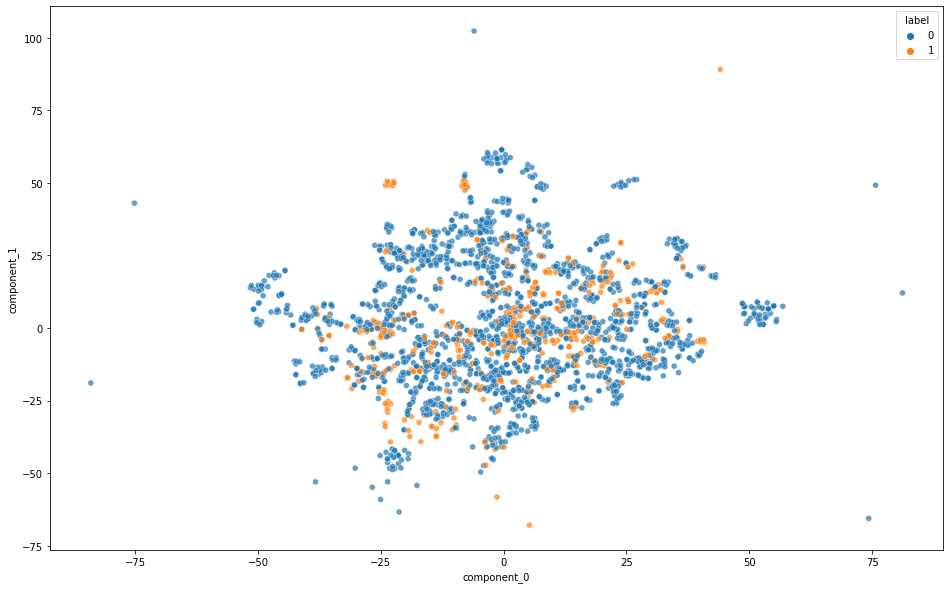

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="component_0", y="component_1",
    hue="label",
    data=embeddings_dataframe,
    legend="full",
    alpha=0.7
)

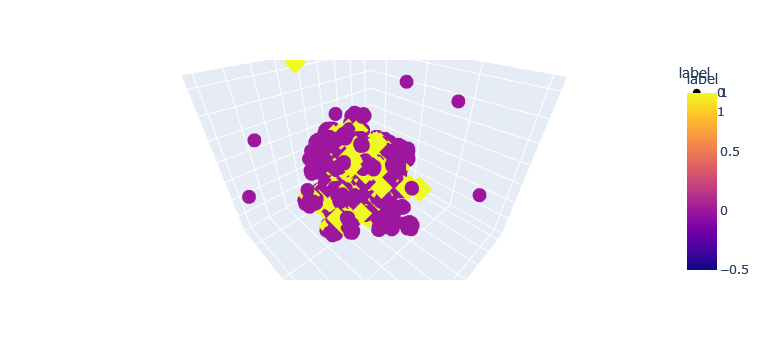

In [13]:
fig = render_3D_scatter_plotly(embeddings_dataframe=embeddings_dataframe)
fig.show()

In [14]:
# seqvec
embeddings_dataframe = pd.DataFrame(transformed_seqvec_embeddings, columns=["component_0", "component_1", "component_2"])
embeddings_dataframe['label'] = chen_data["Y"]
embeddings_dataframe.index = chen_data["Ab_ID"]

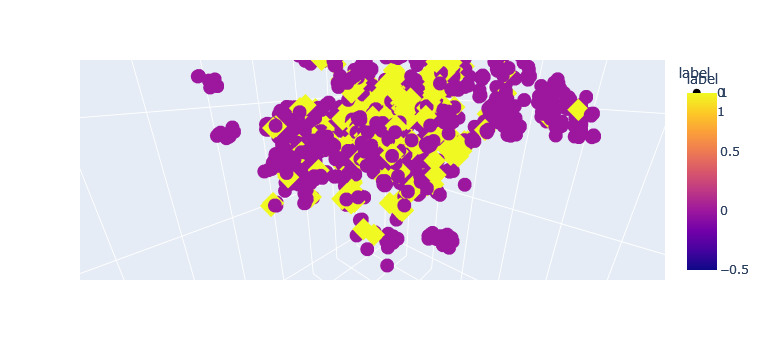

In [15]:
fig = render_3D_scatter_plotly(embeddings_dataframe=embeddings_dataframe)
fig.show()

### Different settings

In [12]:
transformed_bert_embeddings = tsne_reduce(bert_embeddings_list, n_components=2, perplexity=40, n_iter=300)
transformed_seqvec_embeddings = tsne_reduce(seqvec_embeddings_list, n_components=2, perplexity=40, n_iter=300)
# default distance is cosine

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.007s...
[t-SNE] Computed neighbors for 2409 samples in 0.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.224030
[t-SNE] KL divergence after 300 iterations: 1.093465
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.003s...


/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computed neighbors for 2409 samples in 0.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.011134
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.841255
[t-SNE] KL divergence after 300 iterations: 1.179064


In [15]:
# bert
embeddings_dataframe = pd.DataFrame(transformed_bert_embeddings, columns=["component_0", "component_1"])
embeddings_dataframe['label'] = chen_data["Y"]
embeddings_dataframe.index = chen_data["Antibody_ID"]

<AxesSubplot:xlabel='component_0', ylabel='component_1'>

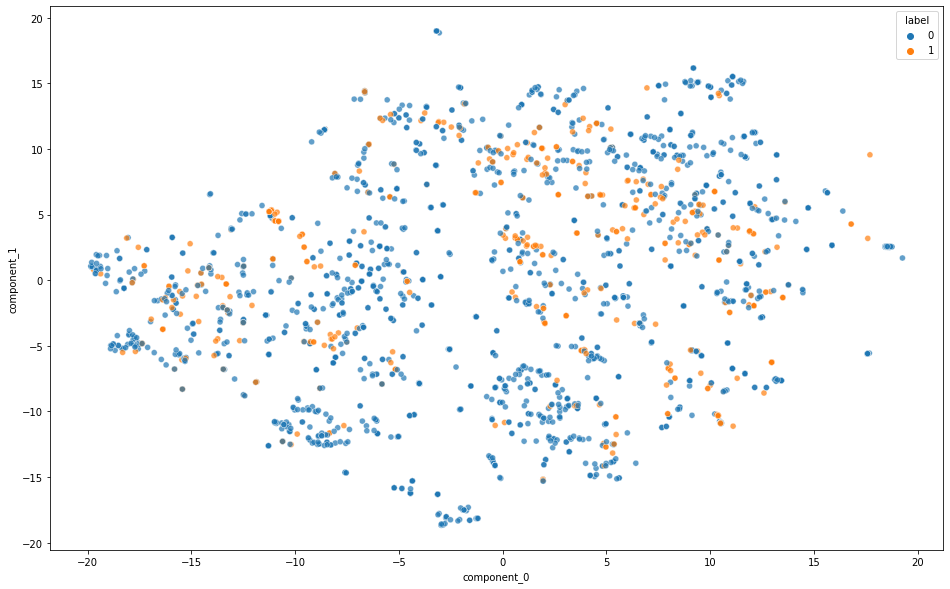

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="component_0", y="component_1",
    hue="label",
    data=embeddings_dataframe,
    legend="full",
    alpha=0.7
)

In [17]:
# seqvec
embeddings_dataframe = pd.DataFrame(transformed_seqvec_embeddings, columns=["component_0", "component_1"])
embeddings_dataframe['label'] = chen_data["Y"]
embeddings_dataframe.index = chen_data["Antibody_ID"]

<AxesSubplot:xlabel='component_0', ylabel='component_1'>

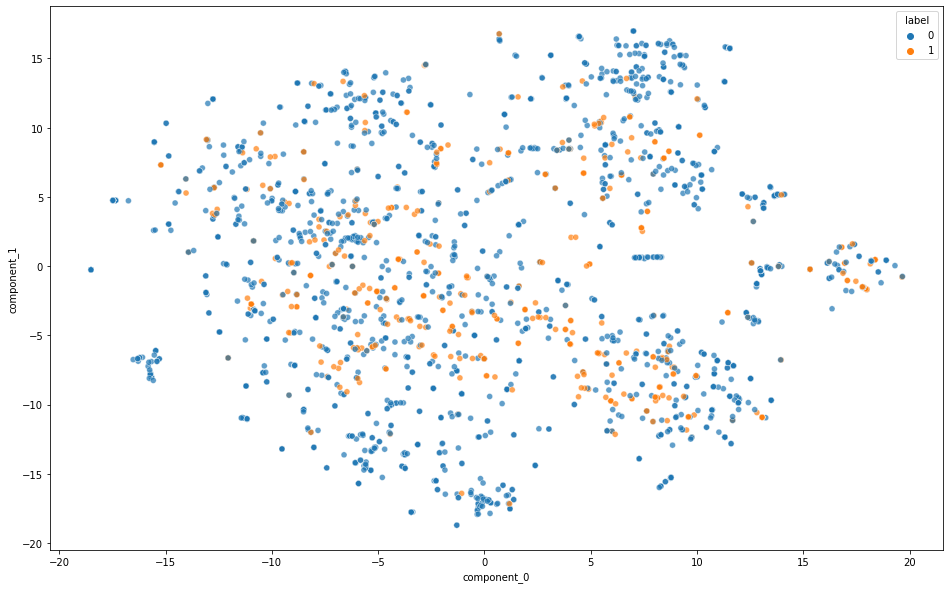

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="component_0", y="component_1",
    hue="label",
    data=embeddings_dataframe,
    legend="full",
    alpha=0.7
)